<a href="https://colab.research.google.com/github/rekuantsun/PTDL-Python/blob/main/TKMT1_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sử dụng thư viện Pandas để phân tích dữ liệu

In [1]:
import pandas as pd

Đọc dữ liệu từ tập tin stave.csv

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ndhcuong/ptdlk2/main/state.csv')

Hiển thị một số thông số cơ bản

In [4]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [6]:
df.shape

(50, 4)

Ghi chú: Nếu có cột dữ liệu ID/STT thì loại bỏ cột này vì không có ý nghĩa khi phân tích dữ liệu

PHÂN TÍCH DỮ LIỆU ĐỊNH LƯỢNG

Sao chép các cột dữ liệu định lượng sang 1 dataframe khác (Khi thành thạo có thể không cần thực hiện thao tác sao chép này)

In [8]:
df_dl = pd.DataFrame(columns = ['Population','Murder.Rate'], data = df)
df_dl.head()

,Population,Murder.Rate
0,4779736,5.7
1,710231,5.6
2,6392017,4.7
3,2915918,5.6
4,37253956,4.4


In [9]:
df_dl.shape

(50, 2)

Tính các thông số thống kê định lượng

In [10]:
print('Giá trị trung bình: ', df_dl['Population'].mean(), "; ", df_dl['Murder.Rate'].mean())

Giá trị trung bình:  6162876.3 ;  4.066


In [11]:
print('Giá trị lớn nhất: ', df_dl['Population'].max(), "; ", df_dl['Murder.Rate'].max())

Giá trị lớn nhất:  37253956 ;  10.3


In [12]:
print('Giá trị nhỏ nhất: ', df_dl['Population'].min(), "; ", df_dl['Murder.Rate'].min())

Giá trị nhỏ nhất:  563626 ;  0.9


In [13]:
print('Độ lệch chuẩn: ', df_dl['Population'].std(), "; ", df_dl['Murder.Rate'].std())

Độ lệch chuẩn:  6848235.347401142 ;  1.915736124302923


In [14]:
print('Phương sai: ', df_dl['Population'].var(), "; ", df_dl['Murder.Rate'].var())

Phương sai:  46898327373394.445 ;  3.670044897959184


In [15]:
print('Q1 của  Population', df_dl['Population'].quantile(0.25), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.25))

Q1 của  Population 1833004.25 ; của Murder.Rate 2.425


In [16]:
print('Q2 của  Population', df_dl['Population'].quantile(0.50), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.50))

Q2 của  Population 4436369.5 ; của Murder.Rate 4.0


In [17]:
print('Q3 của  Population', df_dl['Population'].quantile(0.75), "; của Murder.Rate", df_dl['Murder.Rate'].quantile(0.75))

Q3 của  Population 6680312.25 ; của Murder.Rate 5.55


In [18]:
print('IQR ',df_dl['Population'].quantile(0.75) - df_dl['Population'].quantile(0.25), "; ", df_dl['Murder.Rate'].quantile(0.75) - df_dl['Murder.Rate'].quantile(0.25) )


IQR  4847308.0 ;  3.125


Có thể thay các phép tính riêng biệt trên bằng cách sử dụng hàm describe

In [19]:
df_dl.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


Mô tả trực quan hóa dữ liệu định lượng

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

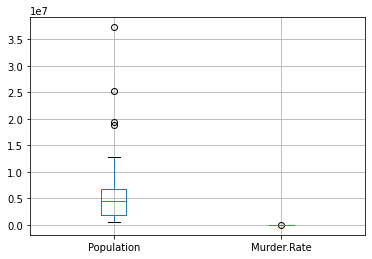

In [21]:
boxplot = df_dl.boxplot(column=['Population', 'Murder.Rate'])

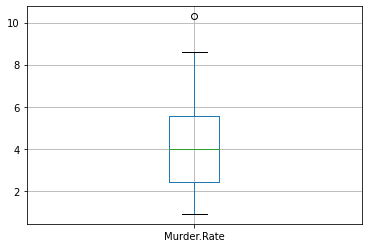

In [22]:
df_dl.boxplot(column=['Murder.Rate'])

Xem xét mối quan hệ giữa 2 biến định lượng có thể sử dụng công cụ trực quan scatterplot

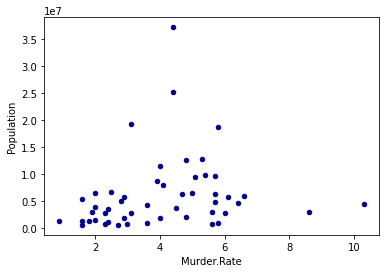

In [24]:
sc = df_dl.plot.scatter(x ='Murder.Rate', y = 'Population', c = 'DarkBlue')

Mối quan hệ giữa 2 cột dữ liệu định lượng còn được biểu hiện qua hệ số tương quan (correlation). Trong pandas có thể tính hệ số này như sau:

In [25]:
df_dl.corr(method='pearson')

,Population,Murder.Rate
Population,1.000000,0.182069
Murder.Rate,0.182069,1.000000


BÀI TẬP: Bạn hãy tìm hiểu về hệ số tương quan (correlation), cách đọc và giải thích ý nghĩa hệ số tương quan.

CÂU TRẢ LỜI

Hệ số tương quan là một cách để đặt giá trị cho mối quan hệ.
- Có giá trị từ -1 đến 1.
- "0" có nghĩ là không có mối quán hệ nào giữa các biến.
- "-1" là một mối tương quan âm hoàn hảo.
- "1" là một mối tương quan dương hoàn hảo.